In [66]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression ,  Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [75]:
# Load the dataset
file_path = 'Final_2_cleaned.csv'  
df = pd.read_csv(file_path)

# Display a sample of the raw data (before cleaning)
print("Sample Raw Data:")
df.head(5)

Sample Raw Data:


,Rank,Ticker,Company Name,Industry,Sector,Country,Profit (Billion $),Revenue (Billion $),Assets (Billion $),Market Value (Billion $),...,Current Price,52 Week High,52 Week Low,CEO,Gender,EBITDA,Rating,Beta,No of Employees,Founding Year
0,1.0,JPM,JPMorganChase,Banks - Diversified,Financial Services,United States,50.0,252.9,4090.7,588.1,...,267.30,270.82,172.62,James Dimon,Male,74.63,3.0,1.09,317233,1980
1,2.0,BRK-B,Berkshire Hathaway,Insurance - Diversified,Financial Services,United States,73.4,369.0,1070.0,899.1,...,468.67,491.67,389.29,Warren E. Buffett,Male,0.00,3.0,0.86,392400,1996
2,3.0,2222.SR,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Integrated,Energy,Saudi Arabia,116.9,489.1,661.5,1919.3,...,27.65,32.65,26.80,Amin H. Nasser,Male,996.71,3.0,0.17,67947,2019
3,4.0,1398.HK,ICBC,Banks - Diversified,Financial Services,China,50.4,223.8,6586.0,215.2,...,5.28,5.36,3.75,Chen Siqing,Male,12.18,3.0,0.97,72000,1980
4,5.0,BAC,Bank of America,Banks - Diversified,Financial Services,United States,25.0,183.3,3273.8,307.3,...,46.30,48.08,32.35,Brian T. Moynihan,Male,29.25,1.0,1.33,213000,1973


In [76]:
# Feature engineering: Create new features
df['Profit_to_Revenue'] = df['Profit (Billion $)'] / df['Revenue (Billion $)']
df['MarketValue_to_Assets'] = df['Market Value (Billion $)'] / df['Assets (Billion $)']

df = df.drop(['Rank','CEO', 'Company Name', 'Ticker','Country','Founding Year'], axis=1)  

print("\nSample Cleaned Data:")
df.head(5)


Sample Cleaned Data:


,Industry,Sector,Profit (Billion $),Revenue (Billion $),Assets (Billion $),Market Value (Billion $),Market Cap(Billion $),PE Ratio,Current Price,52 Week High,52 Week Low,Gender,EBITDA,Rating,Beta,No of Employees,Profit_to_Revenue,MarketValue_to_Assets
0,Banks - Diversified,Financial Services,50.0,252.9,4090.7,588.1,747.80,13.53,267.30,270.82,172.62,Male,74.63,3.0,1.09,317233,0.197707,0.143765
1,Insurance - Diversified,Financial Services,73.4,369.0,1070.0,899.1,1010.43,9.48,468.67,491.67,389.29,Male,0.00,3.0,0.86,392400,0.198916,0.840280
2,Oil & Gas Integrated,Energy,116.9,489.1,661.5,1919.3,6698.99,16.36,27.65,32.65,26.80,Male,996.71,3.0,0.17,67947,0.239010,2.901436
3,Banks - Diversified,Financial Services,50.4,223.8,6586.0,215.2,2449.09,5.03,5.28,5.36,3.75,Male,12.18,3.0,0.97,72000,0.225201,0.032675
4,Banks - Diversified,Financial Services,25.0,183.3,3273.8,307.3,352.38,14.42,46.30,48.08,32.35,Male,29.25,1.0,1.33,213000,0.136388,0.093866


In [79]:
# Define features and target variable
X = df[['Gender', 'Industry', 'Sector', 'Revenue (Billion $)', 'Assets (Billion $)', 'PE Ratio', 'Profit_to_Revenue', 'MarketValue_to_Assets']]  # Features
y = df['Profit (Billion $)']  # Target variable

# Preprocessing: Encode categorical variables and standardize numerical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Gender', 'Industry', 'Sector']),  # One-hot encode categorical columns
        ('num', StandardScaler(), ['Revenue (Billion $)', 'Assets (Billion $)', 'PE Ratio', 'Profit_to_Revenue', 'MarketValue_to_Assets'])  # Scale numerical columns
    ]
)

X_processed = preprocessor.fit_transform(X)

In [78]:
# X_processed_df = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())

# # Verify shapes before splitting
# print("Shape of X_processed_df:", X_processed_df.shape)
# print("Shape of y:", y.shape)

In [85]:
# Split the data into training and testing sets
X_processed = X_processed.toarray()
# X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

In [93]:
# Display a sample of the training and testing data
X_train_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_test_df = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())
y_train_df = pd.DataFrame(y_train,columns=preprocessor.get_feature_names_out())
y_test_df = pd.DataFrame(y_test,columns=preprocessor.get_feature_names_out())

# Print a sample of X_train and X_test
print("Sample Training Data:")
print(X_train_df.head(5)) 

Sample Training Data:
   cat__Gender_Female  cat__Gender_Male  cat__Industry_Aerospace & Defense  \
0                 0.0               1.0                                0.0   
1                 0.0               1.0                                0.0   
2                 0.0               1.0                                0.0   
3                 1.0               0.0                                0.0   
4                 0.0               1.0                                0.0   

   cat__Industry_Airlines  cat__Industry_Apparel Retail  \
0                     0.0                           0.0   
1                     0.0                           0.0   
2                     0.0                           0.0   
3                     0.0                           0.0   
4                     0.0                           0.0   

   cat__Industry_Asset Management  cat__Industry_Auto Manufacturers  \
0                             0.0                               0.0   
1           

In [94]:
print("Sample Testing Data:")
print(X_test_df.head(5)) 

Sample Testing Data:
   cat__Gender_Female  cat__Gender_Male  cat__Industry_Aerospace & Defense  \
0                 1.0               0.0                                0.0   
1                 1.0               0.0                                0.0   
2                 0.0               1.0                                0.0   
3                 0.0               1.0                                0.0   
4                 0.0               1.0                                0.0   

   cat__Industry_Airlines  cat__Industry_Apparel Retail  \
0                     0.0                           0.0   
1                     0.0                           0.0   
2                     0.0                           0.0   
3                     0.0                           0.0   
4                     0.0                           0.0   

   cat__Industry_Asset Management  cat__Industry_Auto Manufacturers  \
0                             0.0                               0.0   
1            

In [88]:
# Hyperparameter tuning for Ridge Regression using GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Regularization strength
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [89]:
# Get the best model from GridSearchCV
best_ridge_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_ridge_model.predict(X_test)

In [90]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Best Alpha: 0.01
Mean Squared Error: 2843.43
R-squared: 0.75



Feature Coefficients:
                                    Feature  Coefficient
81                   num__Profit_to_Revenue   101.619141
62            cat__Industry_Travel Services    27.564684
82               num__MarketValue_to_Assets    23.391865
55  cat__Industry_Software - Infrastructure    17.308768
9         cat__Industry_Beverages - Brewers    16.000426
78                 num__Revenue (Billion $)    11.983128
13                  cat__Industry_Chemicals    10.722810
61        cat__Industry_Tools & Accessories    10.143511


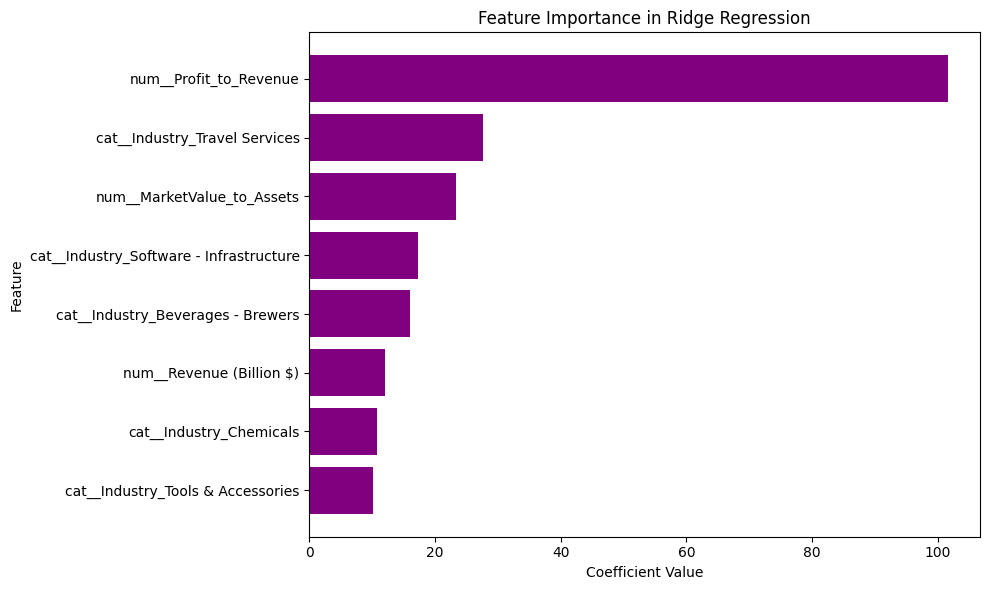

In [91]:
# Print feature coefficients for interpretation
feature_names = preprocessor.get_feature_names_out()
coefficients = best_ridge_model.coef_
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False).head(8)
print("\nFeature Coefficients:")
print(coeff_df)



plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='purple')
plt.title("Feature Importance in Ridge Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# # Train a linear regression model on the training data
# reg_model = LinearRegression()
# reg_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = reg_model.predict(X_test)

In [25]:
# # Evaluate model performance
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R-squared: {r2:.2f}")

In [26]:
# # Print model coefficients for interpretation
# feature_names = preprocessor.get_feature_names_out()
# coefficients = reg_model.coef_
# coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
# print("\nFeature Coefficients:")
# print(coeff_df)

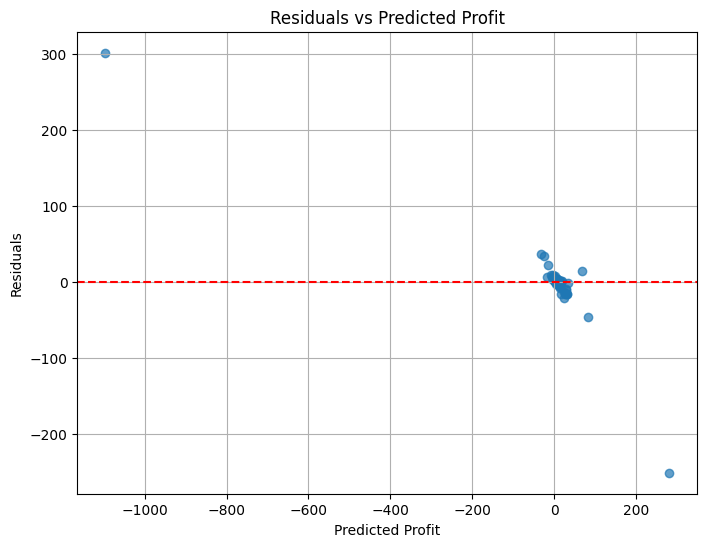

In [103]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Profit")
plt.xlabel("Predicted Profit")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()